In [1]:
#data loading
import pandas as pd
filename="/content/Fertility2.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames morekids gender1 gender2  age afam hispanic other  work
0             1       no  female  female   35   no       no    no    40
1             2       no  female    male   33   no       no    no    52
2             3       no  female  female   28   no       no    no    12
3             4       no    male    male   28   no       no    no     0
4             5       no  female    male   31   no       no    no     0
...         ...      ...     ...     ...  ...  ...      ...   ...   ...
29995     29996      yes    male  female   34   no       no    no     0
29996     29997       no    male    male   30   no       no    no     4
29997     29998      yes    male  female   34   no       no    no    42
29998     29999      yes    male    male   31  yes       no    no    52
29999     30000       no  female  female   29   no       no    no     0

[30000 rows x 9 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
morekids,0
gender1,0
gender2,0
age,0
afam,0
hispanic,0
other,0
work,0


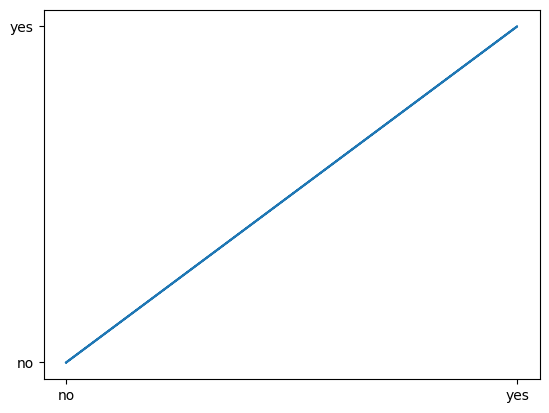

In [3]:
from matplotlib import pyplot as plt
target="morekids"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 30000 artists>

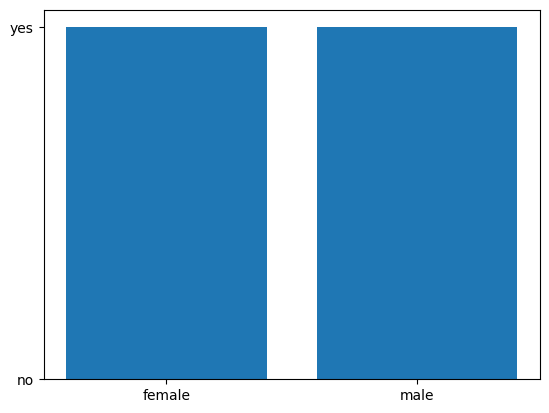

In [4]:
plt.bar(a[a.columns[2]],a[str(target)])

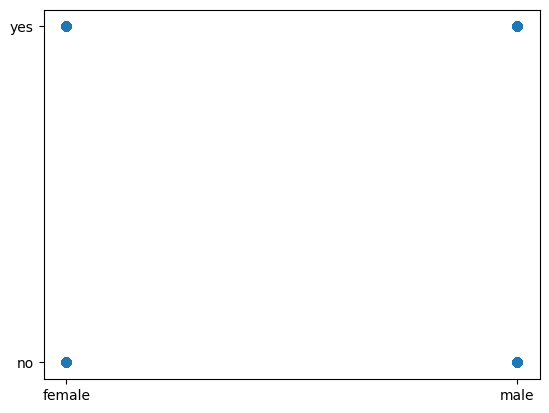

In [5]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1,2,3,5,6,7}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  morekids  gender1  gender2  age  afam  hispanic  other  work
0             1         0        0        0   35     0         0      0    40
1             2         0        0        1   33     0         0      0    52
2             3         0        0        0   28     0         0      0    12
3             4         0        1        1   28     0         0      0     0
4             5         0        0        1   31     0         0      0     0
...         ...       ...      ...      ...  ...   ...       ...    ...   ...
29995     29996         1        1        0   34     0         0      0     0
29996     29997         0        1        1   30     0         0      0     4
29997     29998         1        1        0   34     0         0      0    42
29998     29999         1        1        1   31     1         0      0    52
29999     30000         0        0        0   29     0         0      0     0

[30000 rows x 9 columns]


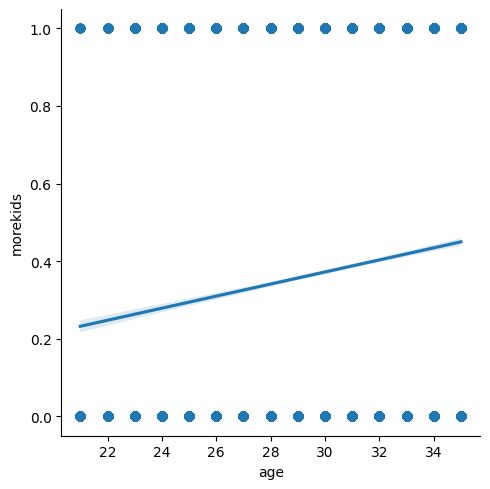

In [8]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='afam', ylabel='morekids'>

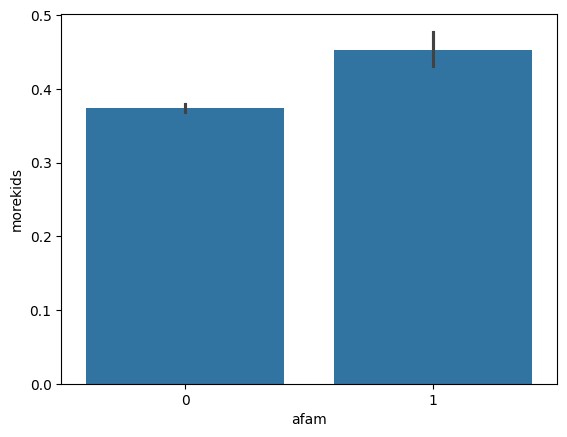

In [9]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='age', ylabel='morekids'>

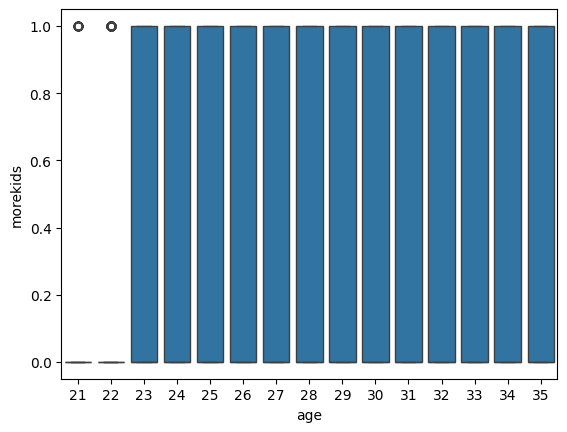

In [11]:
sns.boxplot(x=a.columns[4],y=str(target),data=a)

<ipython-input-12-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='morekids', ylabel='Density'>

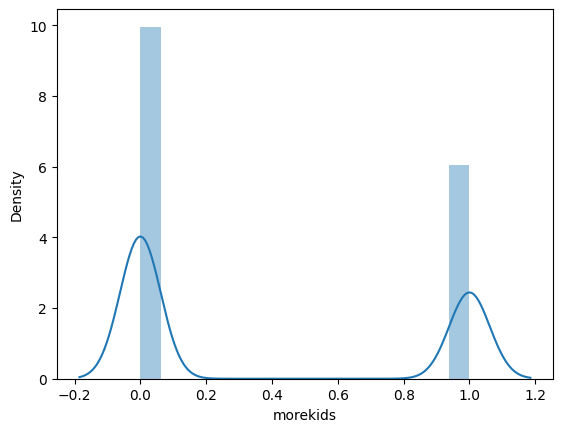

In [12]:
sns.distplot(a[str(target)])

<Axes: xlabel='morekids', ylabel='Density'>

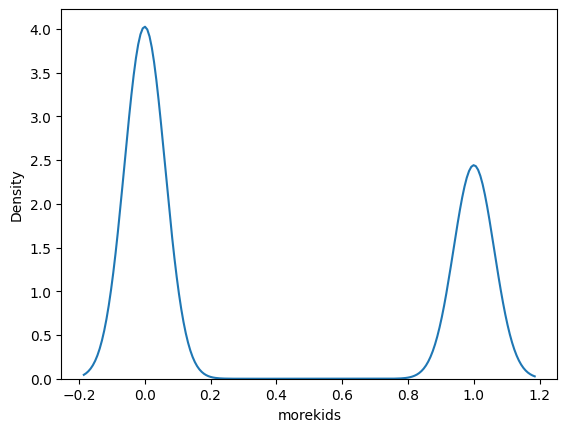

In [13]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='count'>

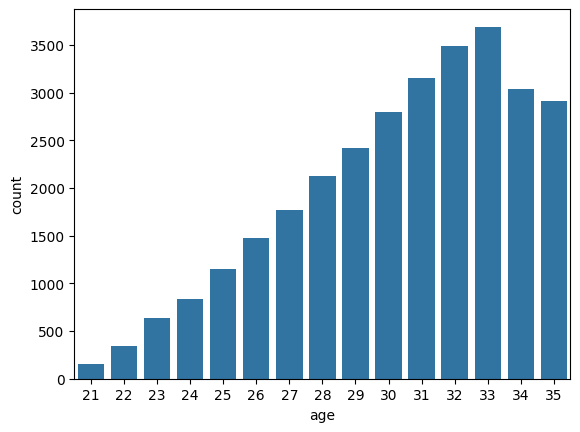

In [14]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

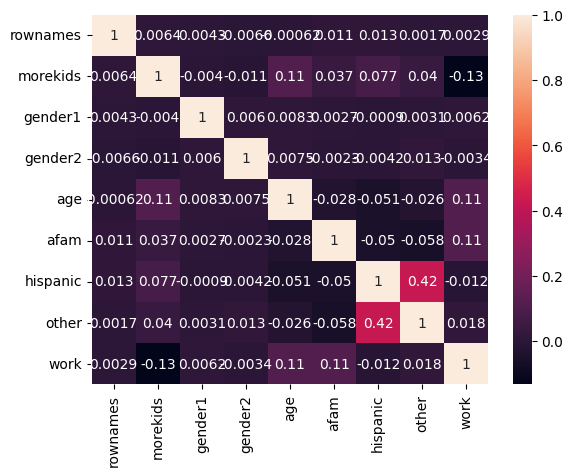

In [15]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()
sns.heatmap(data, annot=True)

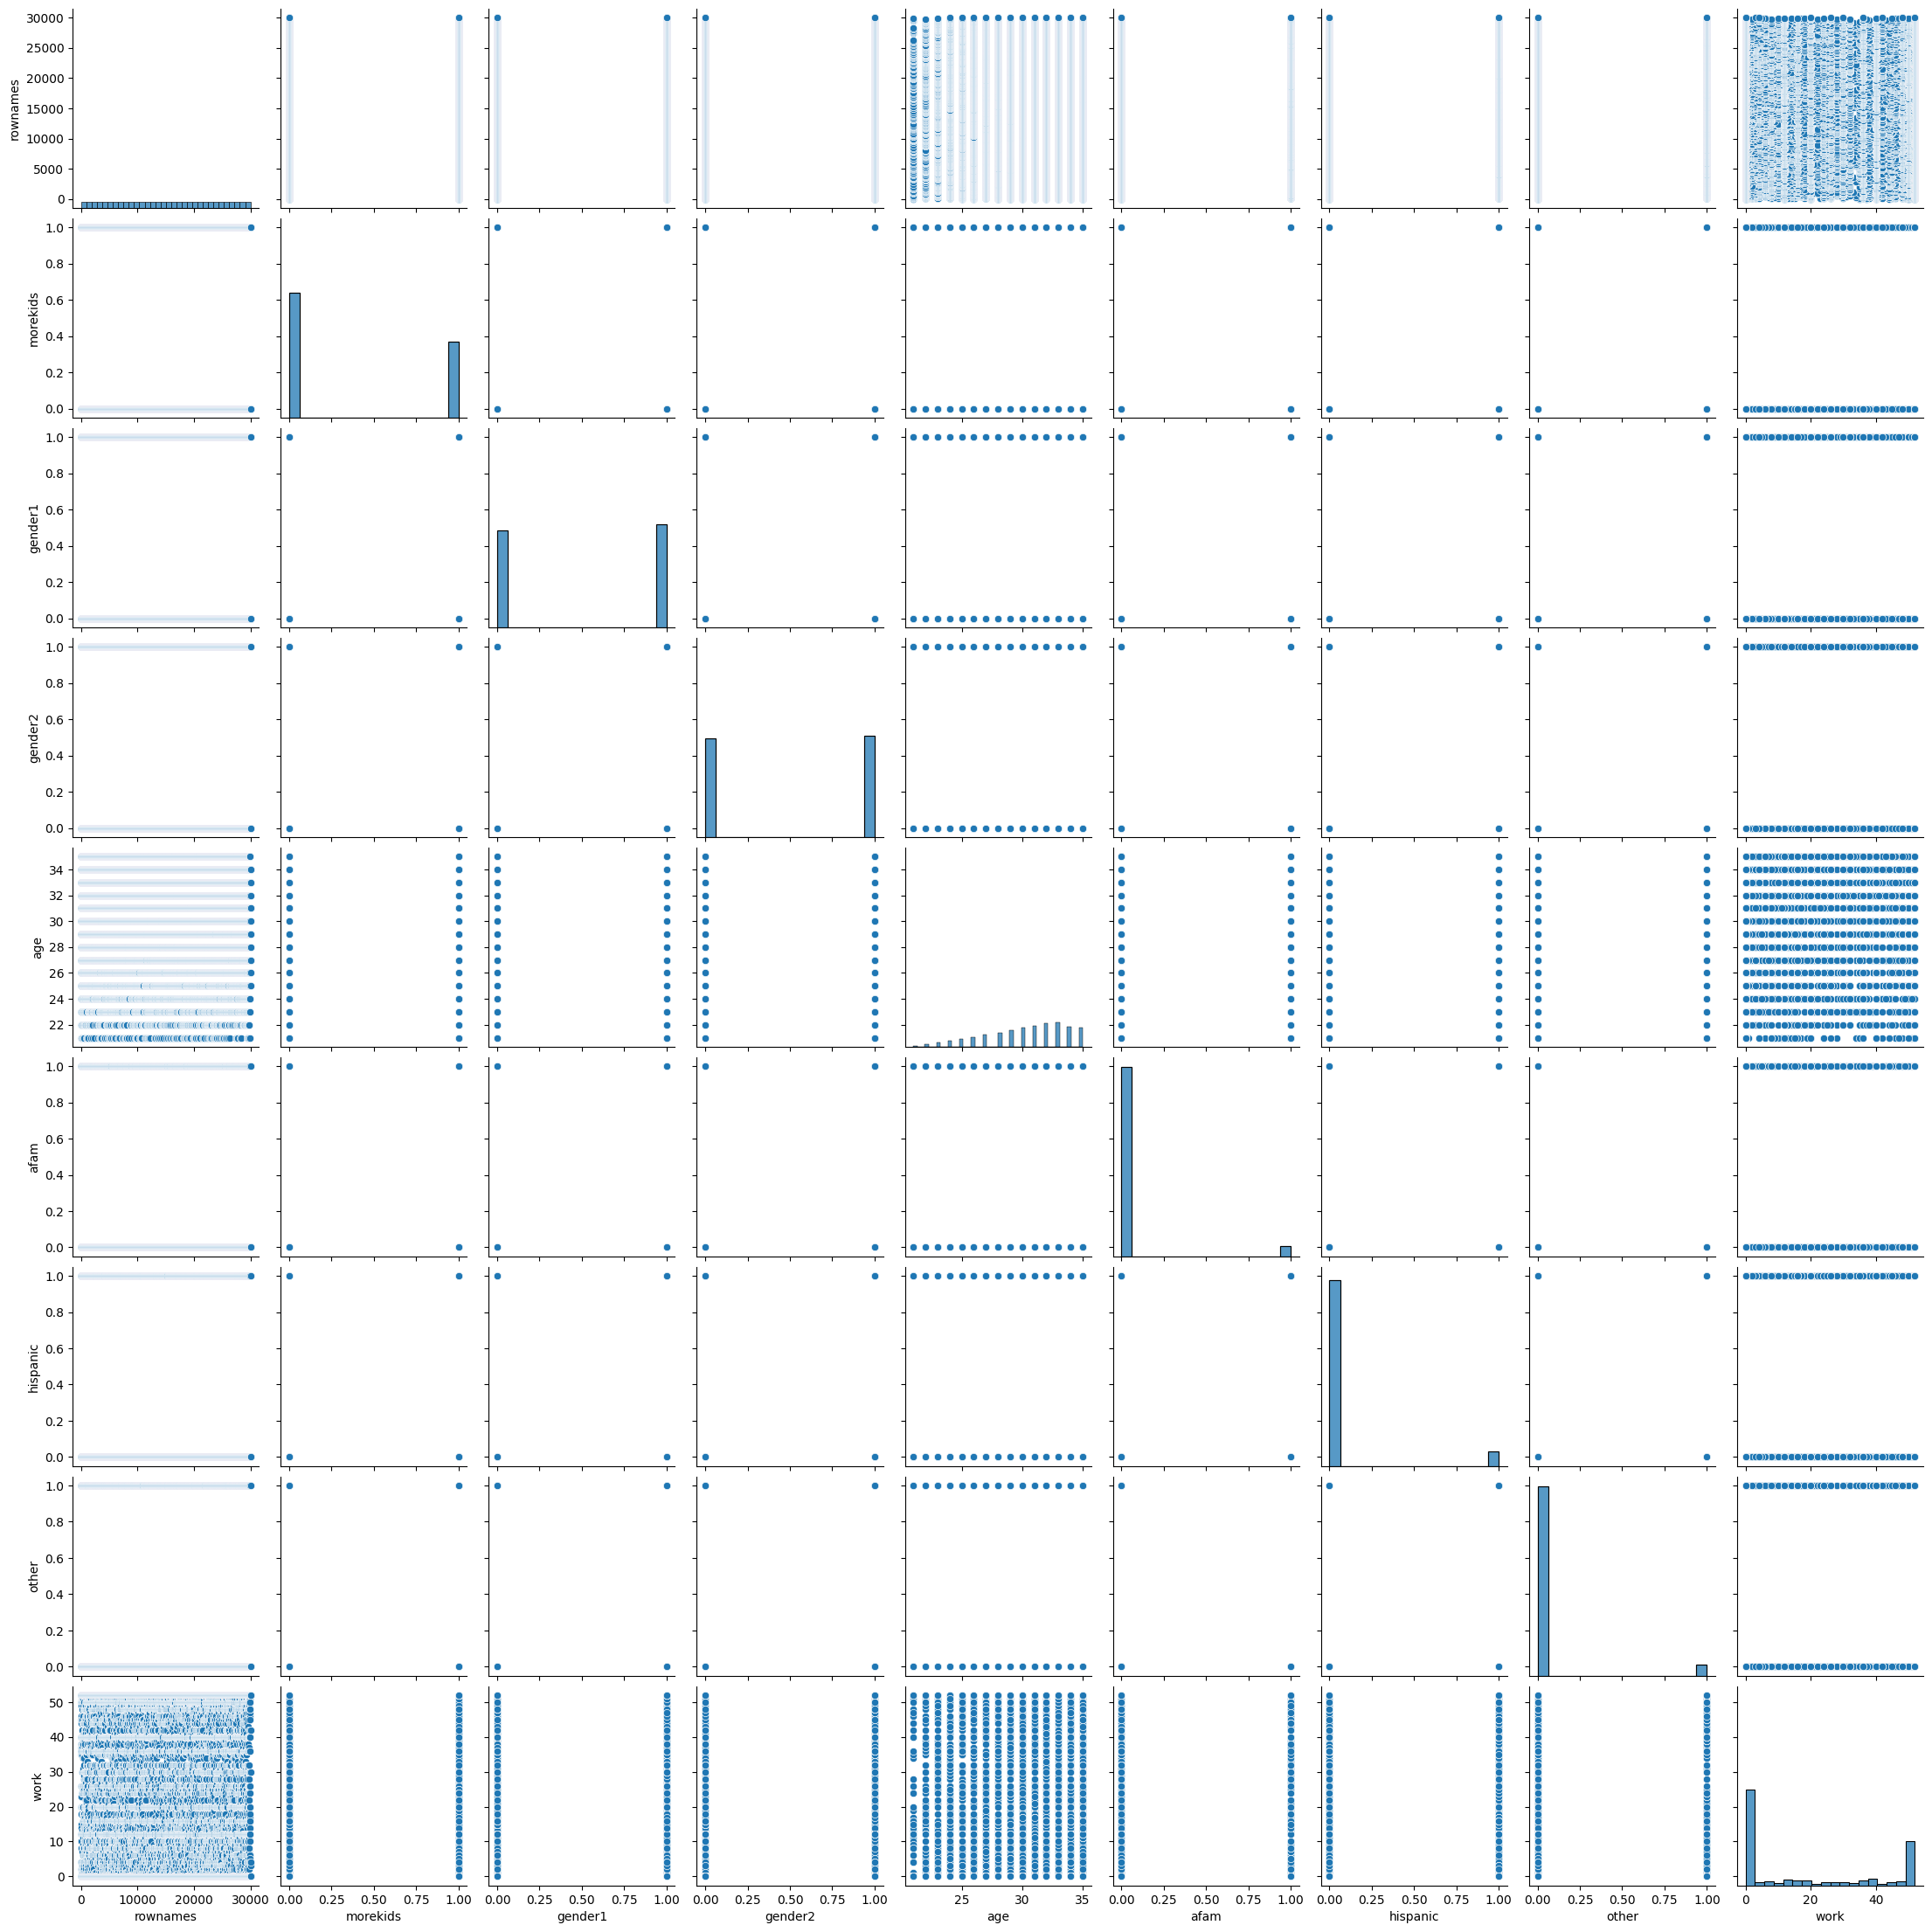

In [16]:
sns.pairplot(data=a)

In [17]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  gender1  gender2  age  afam  hispanic  other  work
0             1        0        0   35     0         0      0    40
1             2        0        1   33     0         0      0    52
2             3        0        0   28     0         0      0    12
3             4        1        1   28     0         0      0     0
4             5        0        1   31     0         0      0     0
...         ...      ...      ...  ...   ...       ...    ...   ...
29995     29996        1        0   34     0         0      0     0
29996     29997        1        1   30     0         0      0     4
29997     29998        1        0   34     0         0      0    42
29998     29999        1        1   31     1         0      0    52
29999     30000        0        0   29     0         0      0     0

[30000 rows x 8 columns]


In [18]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
29995    1
29996    0
29997    1
29998    1
29999    0
Name: morekids, Length: 30000, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
print(x_train)

       rownames  gender1  gender2  age  afam  hispanic  other  work
12320     12321        0        1   33     0         0      1     0
2487       2488        1        0   30     0         0      0    52
3339       3340        0        1   35     0         0      0     0
19877     19878        1        1   32     0         0      0    52
28036     28037        1        0   33     0         0      0    40
...         ...      ...      ...  ...   ...       ...    ...   ...
29724     29725        0        1   33     0         0      0    52
9683       9684        0        1   31     0         0      0     0
19451     19452        1        1   29     0         1      0    32
17037     17038        1        0   31     0         0      0     0
12154     12155        0        0   35     0         0      0    14

[24000 rows x 8 columns]


In [21]:
print(y_train)

12320    1
2487     0
3339     1
19877    0
28036    0
        ..
29724    0
9683     0
19451    0
17037    0
12154    1
Name: morekids, Length: 24000, dtype: int64


In [22]:
print(x_test)

       rownames  gender1  gender2  age  afam  hispanic  other  work
23378     23379        0        0   33     0         0      0    30
9405       9406        1        0   32     0         0      0     0
11051     11052        1        0   29     0         0      0    39
22023     22024        0        1   33     0         0      0     2
24575     24576        1        0   26     0         1      1    36
...         ...      ...      ...  ...   ...       ...    ...   ...
29992     29993        0        1   32     0         1      1     0
17226     17227        0        1   33     0         0      0     0
6211       6212        0        0   24     0         0      0    10
28529     28530        1        1   23     0         0      0    24
24793     24794        0        1   33     1         0      0     0

[6000 rows x 8 columns]


In [23]:
print(y_test)

23378    0
9405     1
11051    0
22023    1
24575    0
        ..
29992    1
17226    0
6211     0
28529    1
24793    1
Name: morekids, Length: 6000, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(ypred)

[0 0 0 ... 0 0 1]


In [26]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6331666666666667


In [27]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[3561  217]
 [1984  238]]


In [29]:
print(model.predict([[23379,0,0,33,0,0,0,30]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [31]:
print(ypred)

[0 0 1 ... 0 0 0]


In [32]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5535


In [33]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[2377 1401]
 [1278  944]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      3778
           1       0.40      0.42      0.41      2222

    accuracy                           0.55      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.56      0.55      0.56      6000



In [36]:
print(model.predict([[23379,0,0,33,0,0,0,30]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[0 0 1 ... 0 0 1]


In [39]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.57


In [40]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[2594 1184]
 [1396  826]]


In [41]:
print(model.predict([[19,2,8,1,50,0,5,1870]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      3778
           1       0.41      0.37      0.39      2222

    accuracy                           0.57      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.56      0.57      0.57      6000

